<a href="https://colab.research.google.com/github/LucWeb80/BD_ADA/blob/main/Projeto_MachineLearning2_AdaCoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações de pacotes e modulos, e extração de dados

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vishakhdapat_customer_segmentation_clustering_path = kagglehub.dataset_download('vishakhdapat/customer-segmentation-clustering')

print('Data source import complete.')


Data source import complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:

#Definindo o caminho do arquivo
caminho_arquivo = os.path.join(vishakhdapat_customer_segmentation_clustering_path, 'customer_segmentation.csv')


df = pd.read_csv(caminho_arquivo)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Aparecer sempre todas as colunas
pd.set_option('display.max_columns', None)

# Descrição do Dataset

Análise de Personalidade do Cliente  
A Análise de Personalidade do Cliente envolve um exame detalhado dos perfis ideais de clientes de uma empresa. Essa análise facilita uma compreensão mais profunda dos clientes, permitindo que as empresas ajustem seus produtos para atender às necessidades, comportamentos e preocupações distintas de diferentes tipos de clientes.  

Ao realizar uma Análise de Personalidade do Cliente, as empresas podem aprimorar seus produtos com base nas preferências de segmentos específicos de clientes. Em vez de alocar recursos para comercializar um novo produto para toda a base de clientes, as empresas podem identificar os segmentos mais propensos a se interessar pelo produto. Assim, os esforços de marketing direcionados podem ser voltados para esses segmentos específicos, otimizando a utilização de recursos e aumentando a probabilidade de sucesso na adoção do produto.  

Detalhes das Features:  
Id: Identificador único para cada indivíduo no conjunto de dados.  
Year_Birth: O ano de nascimento do indivíduo.  
Education: O nível mais alto de educação alcançado pelo indivíduo.  
Marital_Status: O estado civil do indivíduo.  
Income: A renda anual do indivíduo.  
Kidhome: O número de crianças pequenas na residência.  
Teenhome: O número de adolescentes na residência.  
Dt_Customer: A data em que o cliente foi cadastrado ou passou a fazer parte da base de dados da empresa.  
Recency: O número de dias desde a última compra ou interação.  
MntWines: O valor gasto em vinhos.  
MntFruits: O valor gasto em frutas.  
MntMeatProducts: O valor gasto em produtos de carne.  
MntFishProducts: O valor gasto em produtos de peixe.  
MntSweetProducts: O valor gasto em produtos doces.  
MntGoldProds: O valor gasto em produtos de ouro.  
NumDealsPurchases: O número de compras feitas com desconto ou como parte de uma promoção.  
NumWebPurchases: O número de compras realizadas no site da empresa.  
NumCatalogPurchases: O número de compras realizadas por meio de catálogos.  
NumStorePurchases: O número de compras realizadas em lojas físicas.  
NumWebVisitsMonth: O número de visitas ao site da empresa em um mês.  
AcceptedCmp3: Indicador binário (1 ou 0) se o indivíduo aceitou a terceira campanha de marketing.  
AcceptedCmp4: Indicador binário (1 ou 0) se o indivíduo aceitou a quarta campanha de marketing.  
AcceptedCmp5: Indicador binário (1 ou 0) se o indivíduo aceitou a quinta campanha de marketing.  
AcceptedCmp1: Indicador binário (1 ou 0) se o indivíduo aceitou a primeira campanha de marketing.  
AcceptedCmp2: Indicador binário (1 ou 0) se o indivíduo aceitou a segunda campanha de marketing.  
Complain: Indicador binário (1 ou 0) se o indivíduo fez uma reclamação.  
Z_CostContact: Um custo constante associado ao contato com o cliente.  
Z_Revenue: Uma receita constante associada a uma resposta bem-sucedida à campanha.  
Response: Indicador binário (1 ou 0) se o indivíduo respondeu à campanha de marketing.  

# 1 - EDA

## Avaliação macro dos dados

In [ ]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Detectado 24 nulos na feature 'Income'.  
Feature 'Dt_Customer' nessecita conversão para tipo datetime

In [ ]:
# Exibindo valores unicos de cada coluna
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Valores únicos da coluna {column}:')
    print(unique_values)
    print('\n')

Valores únicos da coluna ID:
[5524 2174 4141 ... 7270 8235 9405]


Valores únicos da coluna Year_Birth:
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]


Valores únicos da coluna Education:
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


Valores únicos da coluna Marital_Status:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


Valores únicos da coluna Income:
[58138. 46344. 71613. ... 56981. 69245. 52869.]


Valores únicos da coluna Kidhome:
[0 1 2]


Valores únicos da coluna Teenhome:
[0 1 2]


Valores únicos da coluna Dt_Customer:
['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Limpeza e Transformações

## Transformações no dataframe original para uso global

In [ ]:
# Convertendo para datetime a coluna de data de cadastro
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
# Criando uma coluna de idade do cliente
df['age'] = 2021 - df['Year_Birth']

# Selecinando as colunas para somar
columns_to_sum = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Criando coluna TotalMnt(soma total das colunas de gasto com produtos)
df['TotalMnt'] = df[columns_to_sum].sum(axis=1)

In [ ]:
#Criar uma lista com os anos a serem removidos
anos_para_remover = [1893, 1899, 1900]

#Filtrar o DataFrame para excluir as linhas com esses anos em 'Year_Birth'
df = df[~df['Year_Birth'].isin(anos_para_remover)]

#Verificar o resultado (opcional)
print(df['Year_Birth'].unique())

[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1990 1947 1993 1994 1941 1944 1995 1940]


## Transformações para uso especifico usando uma cópia do dataframe original

In [ ]:
df_analise_estat = df.copy()

#Criado um Intervalo de idades
df_analise_estat['range_idade'] = df_analise_estat['age'].apply(lambda x:
                                                      '< 30' if x < 30
                                                      else '< 50' if x < 50
                                                      else '< 70' if x < 70
                                                      else '71+')

In [ ]:
df_analise_estat.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'TotalMnt', 'range_idade'],
      dtype='object')

## Explorando features categoricas

In [ ]:
# Separando as colunas categoricas
categorical_cols = [col for col in df.columns if df[col].dtype.name in ['object', 'category']]

#Imprimindo na tela  os valores únicos
for columns in categorical_cols:
    print(f'Valores únicos da coluna {columns}:')
    print(df[columns].unique())
    print('\n')

Valores únicos da coluna Education:
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


Valores únicos da coluna Marital_Status:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']




Veri

In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,579
Single,479
Divorced,231
Widow,77
Alone,3
Absurd,2
YOLO,2


In [ ]:
df[df['Marital_Status'] == 'YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0,48,424
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1,48,424


In [ ]:
df[df['Marital_Status'] == 'Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1,28,1216
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0,64,1169


In [ ]:
df[df['Marital_Status'] == 'Alone']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt
131,433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,3,11,0,63,632
138,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,3,11,1,48,49
153,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,3,11,0,33,89


In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,54,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,75,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,40,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,65,843


# Analise estatística para tentar segmentar o cliente

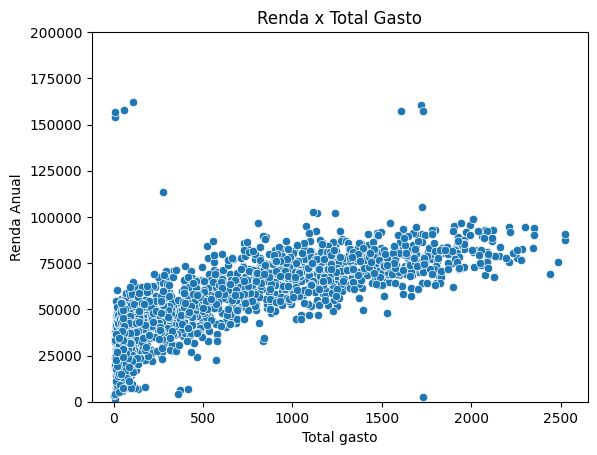

In [ ]:
sns.scatterplot(data=df_analise_estat, y='Income', x='TotalMnt')
plt.ylim(0, 200000)
plt.title('Renda x Total Gasto')
plt.xlabel('Total gasto')
plt.ylabel('Renda Anual')
plt.show()

Foi delimitado o range maximo do eixo y para 200.000, devido a existencia de um outlier.  
Percebe-se uma correlação positiva moderada. Quanto maior o gasto com vinho, maior a renda sobe um pouco.

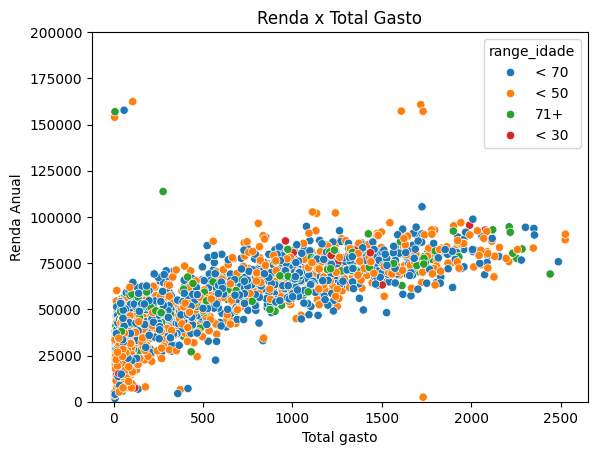

In [ ]:
sns.scatterplot(data=df_analise_estat, y='Income', x='TotalMnt', hue='range_idade')
plt.ylim(0, 200000)
plt.title('Renda x Total Gasto')
plt.xlabel('Total gasto')
plt.ylabel('Renda Anual')
plt.show()

Adicionando intervalo de idade, não conseguimos agrupar os clientes.  

In [ ]:
df_analise_estat[['age', 'Income', 'TotalMnt']].corr()

,age,Income,TotalMnt
age,1.000000,0.163295,0.113865
Income,0.163295,1.000000,0.667516
TotalMnt,0.113865,0.667516,1.000000


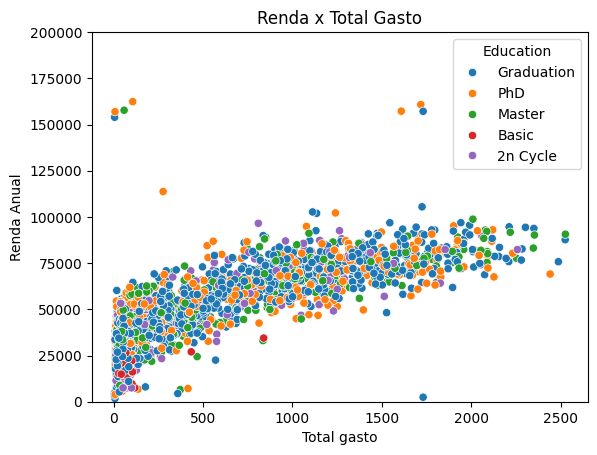

In [ ]:
sns.scatterplot(data=df_analise_estat, y='Income', x='TotalMnt', hue='Education')
plt.ylim(0, 200000)
plt.title('Renda x Total Gasto')
plt.xlabel('Total gasto')
plt.ylabel('Renda Anual')
plt.show()

Por estado civil ainda não é possivel segmentar os clientes.

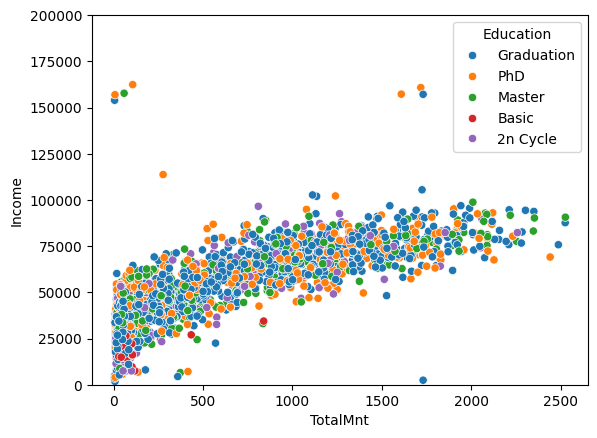

In [ ]:
sns.scatterplot(data=df_analise_estat, y='Income', x='TotalMnt', hue='Education')
plt.ylim(0, 200000)
plt.show()

Por educação ainda continua não sendo possivel agrupar.

#Redimensionamento com PCA, Clusterização e Analise de perfil dos clientes.

In [ ]:
df2 = pd.get_dummies(df.drop(columns = ['Dt_Customer', 'Year_Birth', 'ID']))
df2

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,1617,False,False,True,False,False,False,False,False,False,True,False,False,False
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,27,False,False,True,False,False,False,False,False,False,True,False,False,False
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,776,False,False,True,False,False,False,False,False,False,False,True,False,False
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,53,False,False,True,False,False,False,False,False,False,False,True,False,False
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,422,False,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,54,1341,False,False,True,False,False,False,False,False,True,False,False,False,False
2236,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,75,444,False,False,False,False,True,False,False,False,False,False,True,False,False
2237,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,40,1241,False,False,True,False,False,False,False,True,False,False,False,False,False
2238,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,65,843,False,False,False,True,False,False,False,False,False,False,True,False,False


In [ ]:

df_scaled = StandardScaler().fit_transform(df2)

In [ ]:
df3 = pd.DataFrame(df_scaled, columns = df2.columns)

In [ ]:
df3

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.234435,-0.825388,-0.930227,0.307272,0.983671,1.554623,1.680253,2.461700,1.475877,0.846061,0.348371,1.408080,2.510435,-0.552077,0.692882,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,0.0,0.0,2.386966,1.017296,1.680649,-0.314202,-0.157279,0.992429,-0.445173,-0.526143,-0.029914,-0.036645,-0.339344,-0.793271,1.915763,-0.590945,-0.188807,-0.029914
1,-0.234084,1.032151,0.906417,-0.383584,-0.870717,-0.636422,-0.713250,-0.650275,-0.631440,-0.729569,-0.169096,-1.110957,-0.568802,-1.167421,-0.131574,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,1.273722,-0.961838,-0.314202,-0.157279,0.992429,-0.445173,-0.526143,-0.029914,-0.036645,-0.339344,-0.793271,1.915763,-0.590945,-0.188807,-0.029914
2,0.769733,-0.825388,-0.930227,-0.798098,0.362570,0.572430,-0.176928,1.345050,-0.147000,-0.037829,-0.686563,1.408080,-0.226664,1.293956,-0.543802,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,0.333495,0.282956,-0.314202,-0.157279,0.992429,-0.445173,-0.526143,-0.029914,-0.036645,-0.339344,-0.793271,-0.521985,1.692205,-0.188807,-0.029914
3,-1.016592,1.032151,-0.930227,-0.798098,-0.870717,-0.560868,-0.651196,-0.503829,-0.582996,-0.748784,-0.169096,-0.751094,-0.910939,-0.552077,0.280654,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,-1.290534,-0.918627,-0.314202,-0.157279,0.992429,-0.445173,-0.526143,-0.029914,-0.036645,-0.339344,-0.793271,-0.521985,1.692205,-0.188807,-0.029914
4,0.240593,1.032151,-0.930227,1.550812,-0.389289,0.421324,-0.216820,0.155177,-0.001667,-0.556634,1.383304,0.328493,0.115473,0.063267,-0.131574,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,-1.034108,-0.305371,-0.314202,-0.157279,-1.007629,-0.445173,1.900624,-0.029914,-0.036645,-0.339344,1.260603,-0.521985,-0.590945,-0.188807,-0.029914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0.356988,-0.825388,0.906417,-0.107242,1.203582,0.421324,0.066855,0.081954,2.202538,3.901246,-0.169096,1.767943,0.115473,-0.552077,-0.131574,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,0.162544,1.221953,-0.314202,-0.157279,0.992429,-0.445173,-0.526143,-0.029914,-0.036645,-0.339344,1.260603,-0.521985,-0.590945,-0.188807,-0.029914
2233,0.467861,2.889690,0.906417,0.238186,0.303134,-0.661606,-0.606872,-0.686886,-0.655663,-0.691139,2.418238,1.408080,-0.226664,-0.244405,0.692882,-0.280343,-0.284036,-0.279414,3.812443,-0.11659,-0.09498,0.0,0.0,-0.418942,1.957523,-0.268808,-0.314202,-0.157279,-1.007629,-0.445173,1.900624,-0.029914,-0.036645,-0.339344,-0.793271,-0.521985,1.692205,-0.188807,-0.029914
2234,0.188473,-0.825388,-0.930227,1.447184,1.794966,0.547246,0.221989,-0.101103,-0.364998,-0.383699,-0.686563,-0.751094,0.115473,2.216972,0.280654,-0.280343,3.520683,-0.279414,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,-1.034108,1.055759,-0.314202,-0.157279,0.992429,-0.445173,-0.526143,-0.029914,-0.036645,2.946860,-0.793271,-0.521985,-0.590945,-0.188807,-0.029914
2235,0.675663,-0.825388,0.906417,-1.419868,0.368513,0.093927,0.208692,0.777572,0.070999,0.327256,-0.169096,0.688356,0.799748,1.293956,-0.956029,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,1.102771,0.394307,-0.314202,-0.157279,-1.007629,2.246318,-0.526143,-0.029914,-0.0366

In [ ]:
pca = PCA()
pca.fit(df3.dropna())
cumsum = np.cumsum(pca.explained_variance_ratio_)
numero_min_dimensoes_conf95 = np.argmax(cumsum >= 0.95) + 1
print(f'O número mínimo de dimensões necessárias para explicar 95% da variância é: {numero_min_dimensoes_conf95}')

O número mínimo de dimensões necessárias para explicar 95% da variância é: 29


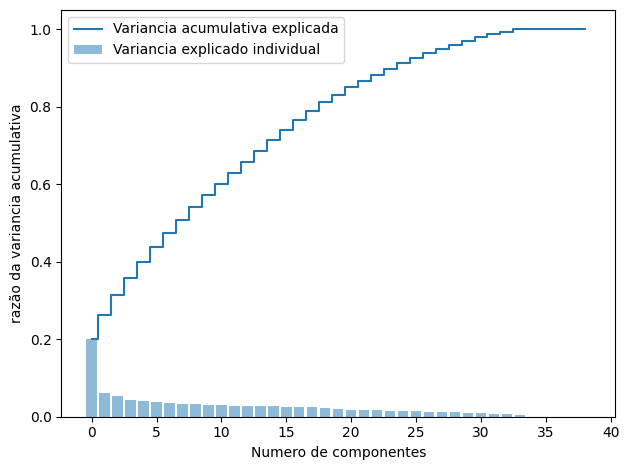

In [ ]:
pca = PCA()
df_redimenssionado = pca.fit_transform(df3.dropna())

exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Variancia explicado individual')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Variancia acumulativa explicada')
plt.ylabel('razão da variancia acumulativa')
plt.xlabel('Numero de componentes')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## PCA com 2 componentes

In [ ]:
pca = PCA(n_components = 2)
df_components = pd.DataFrame(pca.fit_transform(df3.dropna()), columns = ['PCA_1', 'PCA_2'])
df_components

,PCA_1,PCA_2
0,4.149836,-1.082420
1,-2.519155,-0.346910
2,1.629446,-0.387502
3,-2.645975,-1.480381
4,-0.538216,0.300475
...,...,...
2208,2.643553,0.449165
2209,-0.958256,3.239664
2210,1.802710,0.171106
2211,1.738853,1.488105


In [ ]:
pca.explained_variance_ratio_

array([0.20157064, 0.06008344])

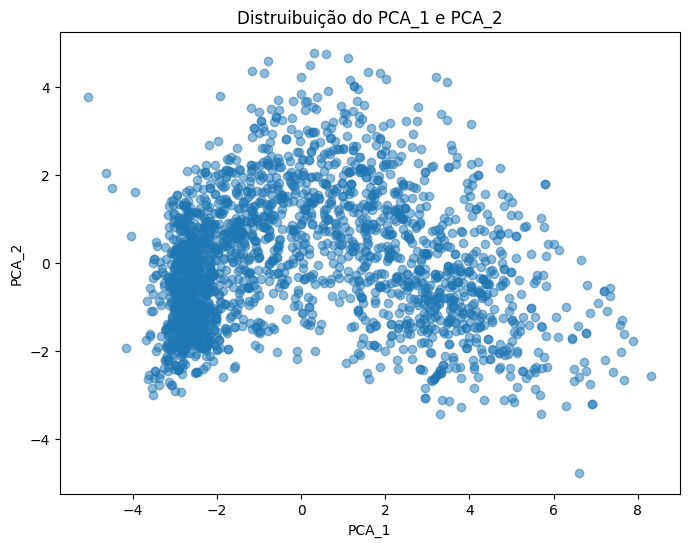

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_components['PCA_1'], df_components['PCA_2'], alpha=0.5)
plt.title('Distruibuição do PCA_1 e PCA_2')
plt.xlabel('PCA_1')
_ = plt.ylabel('PCA_2')

## Clusterização com a clusterização hierárquica aglomerativa

In [ ]:
hc = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
y_hc = hc.fit_predict(df_components)
y_hc

array([2, 0, 1, ..., 1, 1, 0])

In [ ]:
df4 = df3.dropna()
df4.loc[:,'cluster'] = y_hc

<ipython-input-36-0a41ebd217ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:,'cluster'] = y_hc


In [ ]:
df4

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,cluster
0,0.234435,-0.825388,-0.930227,0.307272,0.983671,1.554623,1.680253,2.461700,1.475877,0.846061,0.348371,1.408080,2.510435,-0.552077,0.692882,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,0.0,0.0,2.386966,1.017296,1.680649,-0.314202,-0.157279,0.992429,-0.445173,-0.526143,-0.029914,-0.036645,-0.339344,-0.793271,1.915763,-0.590945,-0.188807,-0.029914,2
1,-0.234084,1.032151,0.906417,-0.383584,-0.870717,-0.636422,-0.713250,-0.650275,-0.631440,-0.729569,-0.169096,-1.110957,-0.568802,-1.167421,-0.131574,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,1.273722,-0.961838,-0.314202,-0.157279,0.992429,-0.445173,-0.526143,-0.029914,-0.036645,-0.339344,-0.793271,1.915763,-0.590945,-0.188807,-0.029914,0
2,0.769733,-0.825388,-0.930227,-0.798098,0.362570,0.572430,-0.176928,1.345050,-0.147000,-0.037829,-0.686563,1.408080,-0.226664,1.293956,-0.543802,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,0.333495,0.282956,-0.314202,-0.157279,0.992429,-0.445173,-0.526143,-0.029914,-0.036645,-0.339344,-0.793271,-0.521985,1.692205,-0.188807,-0.029914,1
3,-1.016592,1.032151,-0.930227,-0.798098,-0.870717,-0.560868,-0.651196,-0.503829,-0.582996,-0.748784,-0.169096,-0.751094,-0.910939,-0.552077,0.280654,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,-1.290534,-0.918627,-0.314202,-0.157279,0.992429,-0.445173,-0.526143,-0.029914,-0.036645,-0.339344,-0.793271,-0.521985,1.692205,-0.188807,-0.029914,0
4,0.240593,1.032151,-0.930227,1.550812,-0.389289,0.421324,-0.216820,0.155177,-0.001667,-0.556634,1.383304,0.328493,0.115473,0.063267,-0.131574,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,-1.034108,-0.305371,-0.314202,-0.157279,-1.007629,-0.445173,1.900624,-0.029914,-0.036645,-0.339344,1.260603,-0.521985,-0.590945,-0.188807,-0.029914,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0.356988,-0.825388,0.906417,-0.107242,1.203582,0.421324,0.066855,0.081954,2.202538,3.901246,-0.169096,1.767943,0.115473,-0.552077,-0.131574,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,0.162544,1.221953,-0.314202,-0.157279,0.992429,-0.445173,-0.526143,-0.029914,-0.036645,-0.339344,1.260603,-0.521985,-0.590945,-0.188807,-0.029914,1
2233,0.467861,2.889690,0.906417,0.238186,0.303134,-0.661606,-0.606872,-0.686886,-0.655663,-0.691139,2.418238,1.408080,-0.226664,-0.244405,0.692882,-0.280343,-0.284036,-0.279414,3.812443,-0.11659,-0.09498,0.0,0.0,-0.418942,1.957523,-0.268808,-0.314202,-0.157279,-1.007629,-0.445173,1.900624,-0.029914,-0.036645,-0.339344,-0.793271,-0.521985,1.692205,-0.188807,-0.029914,1
2234,0.188473,-0.825388,-0.930227,1.447184,1.794966,0.547246,0.221989,-0.101103,-0.364998,-0.383699,-0.686563,-0.751094,0.115473,2.216972,0.280654,-0.280343,3.520683,-0.279414,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,-1.034108,1.055759,-0.314202,-0.157279,0.992429,-0.445173,-0.526143,-0.029914,-0.036645,2.946860,-0.793271,-0.521985,-0.590945,-0.188807,-0.029914,1
2235,0.675663,-0.825388,0.906417,-1.419868,0.368513,0.093927,0.208692,0.777572,0.070999,0.327256,-0.169096,0.688356,0.799748,1.293956,-0.956029,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,0.0,0.0,-0.418942,1.102771,0.394307,-0.314202,-0.157279,-1.007629,2.246318

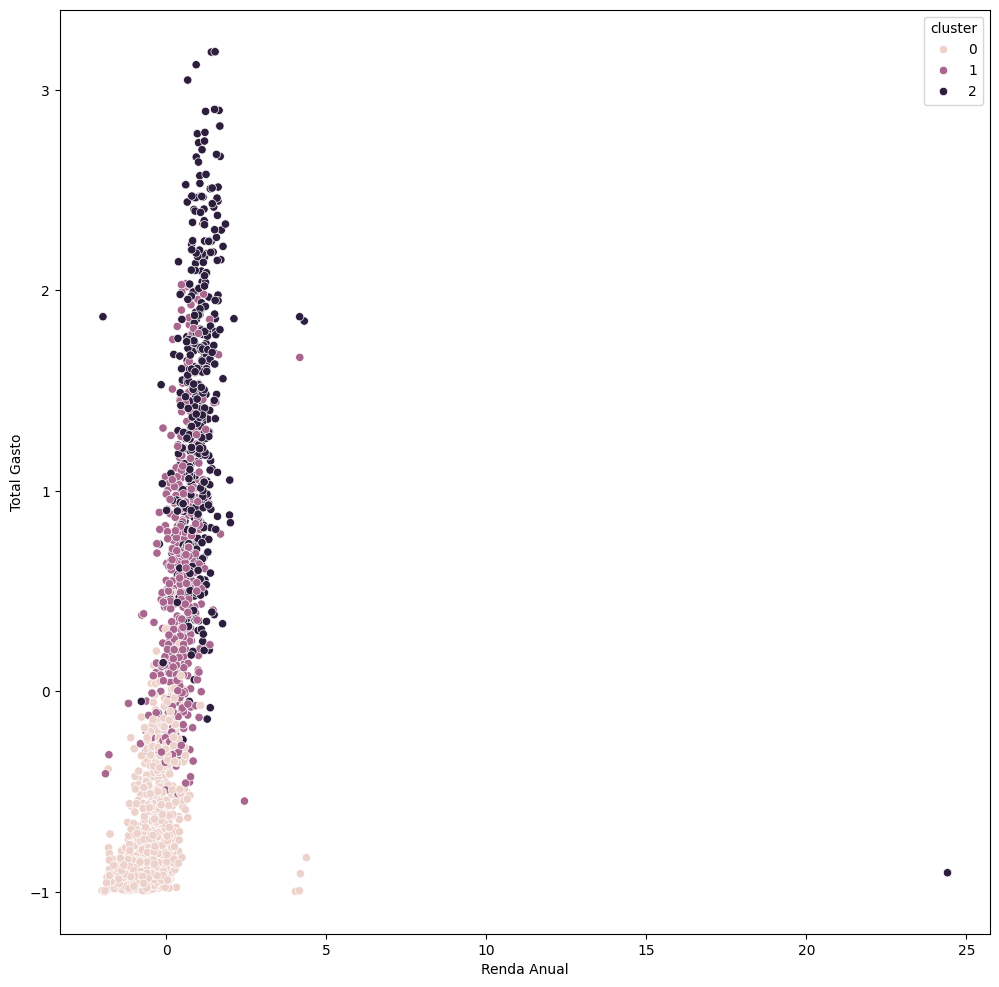

In [ ]:
plt.figure(figsize = (12,12))
sns.scatterplot(data = df4,
               x = 'Income',
               y = 'TotalMnt',
               hue = 'cluster')
plt.xlabel('Renda Anual')
plt.ylabel('Total Gasto')
plt.show()

In [ ]:
df_components.loc[:, 'cluster'] = y_hc

<Axes: xlabel='PCA_1', ylabel='PCA_2'>

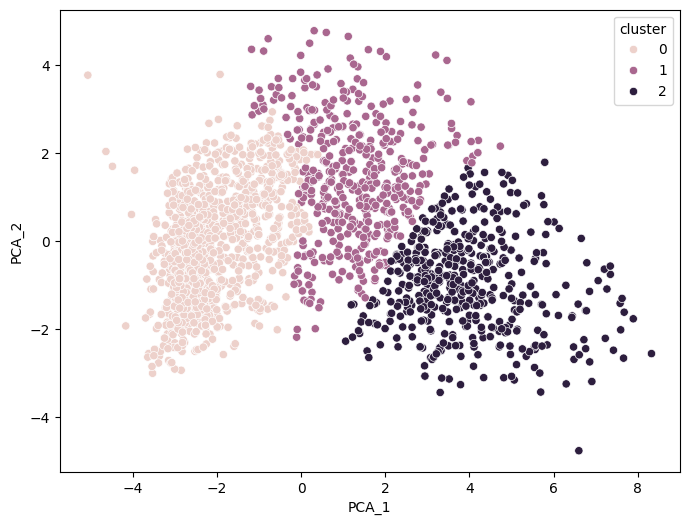

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df_components,
               x = 'PCA_1',
               y = 'PCA_2',
               hue = 'cluster')

###Métricas de avaliação da clusterização hierárquica aglomerativa

SILHOUETTE SCORE

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_components.drop('cluster', axis=1), y_hc)

print(f"The average silhouette score: {silhouette_avg}")

The average silhouette score: 0.46220856326287174


Um valor de 0.4827 sugere:

Clusters moderadamente definidos: há separação razoável entre os clusters, mas também alguma sobreposição ou ambiguidade.  
Pode indicar que os dados têm uma estrutura intrínseca de clusters, mas ela não é completamente clara.  

Intervalos de Interpretação do Silhouette Score:

Próximo de +1:  
Indica que os clusters são bem definidos e separados.
Os pontos estão mais próximos dos outros pontos no mesmo cluster do que de pontos em clusters diferentes.  

Próximo de 0:  
Indica que os pontos estão no limite entre clusters ou que os clusters se sobrepõem, dificultando a separação clara.

Próximo de -1:  
Indica que os pontos estão provavelmente no cluster errado, ou seja, estão mais próximos de clusters diferentes.


Davies-Bouldin Index

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(df_components.drop('cluster', axis=1), y_hc)

print(f"The Davies-Bouldin Index: {davies_bouldin_index}")

The Davies-Bouldin Index: 0.8168864969313222


Interpretação do Davies-Bouldin Index:  

Valores baixos (próximo de 0):  

Indicam que os clusters são bem separados e internamente compactos, o que é desejável.  

Valores altos:  

Sugerem que os clusters estão mal definidos, com sobreposição significativa ou grande variabilidade dentro dos clusters.

Um valor de 0.7663 indica:  

Clusters razoavelmente bem definidos, mas ainda há espaço para melhoria.
Embora os clusters não sejam perfeitos, o índice sugere que eles estão separados o suficiente para serem significativos.

Calinski-Harabasz Index

In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Calculate Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(df_components.drop('cluster', axis=1), y_hc)

print(f"The Calinski-Harabasz Index: {calinski_harabasz_index}")

The Calinski-Harabasz Index: 3014.743939223404


Interpretação do Calinski-Harabasz Index:  

Valores altos:  

Indicam que os clusters são compactos internamente (baixa dispersão intra-cluster) e bem separados uns dos outros (alta dispersão inter-cluster).
Quanto maior o índice, melhor é a definição dos clusters.

Valores baixos:  

Indicam que os clusters não estão bem definidos, com grande sobreposição ou alta dispersão interna.  

Avaliação do Seu Resultado:  
Um índice 3325.86 é excelente em comparação com o que é geralmente observado em muitos conjuntos de dados.  
Ele sugere que os clusters formados capturam bem a estrutura dos dados, com separação clara e boa organização.  

In [ ]:
# Assuming silhouette_avg, davies_bouldin_index, and calinski_harabasz_index are already calculated

data = {
    'Metric': ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'],
    'Value': [silhouette_avg, davies_bouldin_index, calinski_harabasz_index]
}

comparacao_agloHieraquica_vs_kmeans = pd.DataFrame(data)
comparacao_agloHieraquica_vs_kmeans = comparacao_agloHieraquica_vs_kmeans.rename(columns={'Value': 'Agl_Hierarquica'})
comparacao_agloHieraquica_vs_kmeans

,Metric,Agl_Hierarquica
0,Silhouette Score,0.462209
1,Davies-Bouldin Index,0.816886
2,Calinski-Harabasz Index,3014.743939


### Retornando o dataframe para os dados originais, mas mantendo a clusterização para melhor DataViz dos clusters

In [ ]:
df4.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'TotalMnt', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'cluster'],
      dtype='object')

In [ ]:
# 1. Criar um índice comum
df2['index'] = df2.index
index_original = df2['index']

# 2. One-hot encoding, PCA e clusterização (seu código existente)
# ...

# 3. Mesclar os DataFrames
df_final = pd.merge(df4[['cluster']], df2, left_index=True, right_on='index')

# Selecionar as colunas desejadas
df_final = df_final[df2.columns.tolist() + ['cluster']]  # Substitua pelas suas colunas

In [ ]:
df_final

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,index,cluster
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,1617,False,False,True,False,False,False,False,False,False,True,False,False,False,0,2
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,27,False,False,True,False,False,False,False,False,False,True,False,False,False,1,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,776,False,False,True,False,False,False,False,False,False,False,True,False,False,2,1
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,53,False,False,True,False,False,False,False,False,False,False,True,False,False,3,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,422,False,False,False,False,True,False,False,False,True,False,False,False,False,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,26816.0,0,0,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0,35,22,False,False,True,False,False,False,False,False,False,True,False,False,False,2232,1
2233,666666.0,1,0,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0,44,62,False,False,True,False,False,False,False,False,False,False,True,False,False,2233,1
2234,34421.0,1,0,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0,47,30,False,False,True,False,False,False,False,False,True,False,False,False,False,2234,1
2235,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,54,1341,False,False,True,False,False,False,False,False,True,False,False,False,False,2235,1


In [ ]:
df_final['cluster'].value_counts()

,count
cluster,
0,1214
2,501
1,495


Criando e baixando csv de cada cluster

In [ ]:
# Criando os dataframes para cada cluster
df_cliente_perfil_0 = df_final[df_final['cluster'] == 0]
df_cliente_perfil_1 = df_final[df_final['cluster'] == 1]
df_cliente_perfil_2 = df_final[df_final['cluster'] == 2]

In [ ]:
# Convert the DataFrame to CSV
df_cliente_perfil_0.to_csv('df_cliente_perfil_0.csv', index=False)
df_cliente_perfil_1.to_csv('df_cliente_perfil_1.csv', index=False)
df_cliente_perfil_2.to_csv('df_cliente_perfil_2.csv', index=False)

In [ ]:
# Download the CSV file
from google.colab import files
files.download('df_cliente_perfil_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Identificando o perfil no Cluster 0

In [ ]:
df_final[df_final['cluster'] == 0].describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt,index,cluster
count,1211.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.0,1214.0,1214.000000,1214.000000,1214.000000,1214.000000,1214.0
mean,50354.895954,0.472817,0.521417,48.593904,289.809720,24.340198,152.527183,34.876442,24.523064,40.895387,2.382208,3.924217,2.429160,5.626853,5.442339,0.065074,0.073311,0.070840,0.052718,0.012356,0.009061,3.0,11.0,0.136738,51.959638,566.971993,1127.261120,0.0
std,21501.257685,0.540681,0.539414,28.973348,336.653318,38.530665,212.794872,52.899674,39.200300,48.981529,1.953004,2.721934,2.733175,3.209626,2.418237,0.246758,0.260754,0.256663,0.223563,0.110514,0.094796,0.0,0.0,0.343712,11.452796,596.434535,642.811025,0.0
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,25.000000,5.000000,1.000000,0.0
25%,34026.000000,0.000000,0.000000,24.000000,19.250000,1.000000,14.000000,2.000000,1.000000,8.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,61.250000,567.250000,0.0
50%,49514.000000,0.000000,1.000000,49.000000,156.000000,7.000000,54.000000,11.000000,7.000000,22.000000,2.000000,3.000000,1.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,51.000000,312.000000,1144.000000,0.0
75%,66380.000000,1.000000,1.000000,74.000000,481.250000,29.000000,205.750000,43.750000,29.750000,53.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,61.000000,1003.250000,1673.750000,0.0
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,77.000000,2525.000000,2236.000000,0.0


In [ ]:
df_final_cluster0 = df_final[df_final['cluster'] == 0]

In [ ]:
df_final_cluster0

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,index,cluster
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,27,False,False,True,False,False,False,False,False,False,True,False,False,False,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,53,False,False,True,False,False,False,False,False,False,False,True,False,False,3,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,422,False,False,False,False,True,False,False,False,True,False,False,False,False,4,0
7,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,36,169,False,False,False,False,True,False,False,False,True,False,False,False,False,7,0
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,47,46,False,False,False,False,True,False,False,False,False,False,True,False,False,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,63777.0,1,1,87,457,5,106,15,17,53,8,11,1,6,8,0,0,0,0,0,0,3,11,0,42,653,False,False,True,False,False,False,False,False,True,False,False,False,False,2226,0
2227,57967.0,0,1,39,229,7,137,4,0,91,5,4,2,8,5,0,0,0,0,0,0,3,11,0,59,468,False,False,True,False,False,False,False,False,False,True,False,False,False,2227,0
2229,24434.0,2,0,9,3,2,8,20,0,17,2,2,1,2,7,0,0,0,0,0,0,3,11,0,49,50,False,False,True,False,False,False,False,False,True,False,False,False,False,2229,0
2231,44802.0,0,0,71,853,10,143,13,10,20,2,9,4,12,8,0,0,0,0,0,0,3,11,0,51,1049,False,False,False,True,False,False,False,False,False,True,False,False,False,2231,0


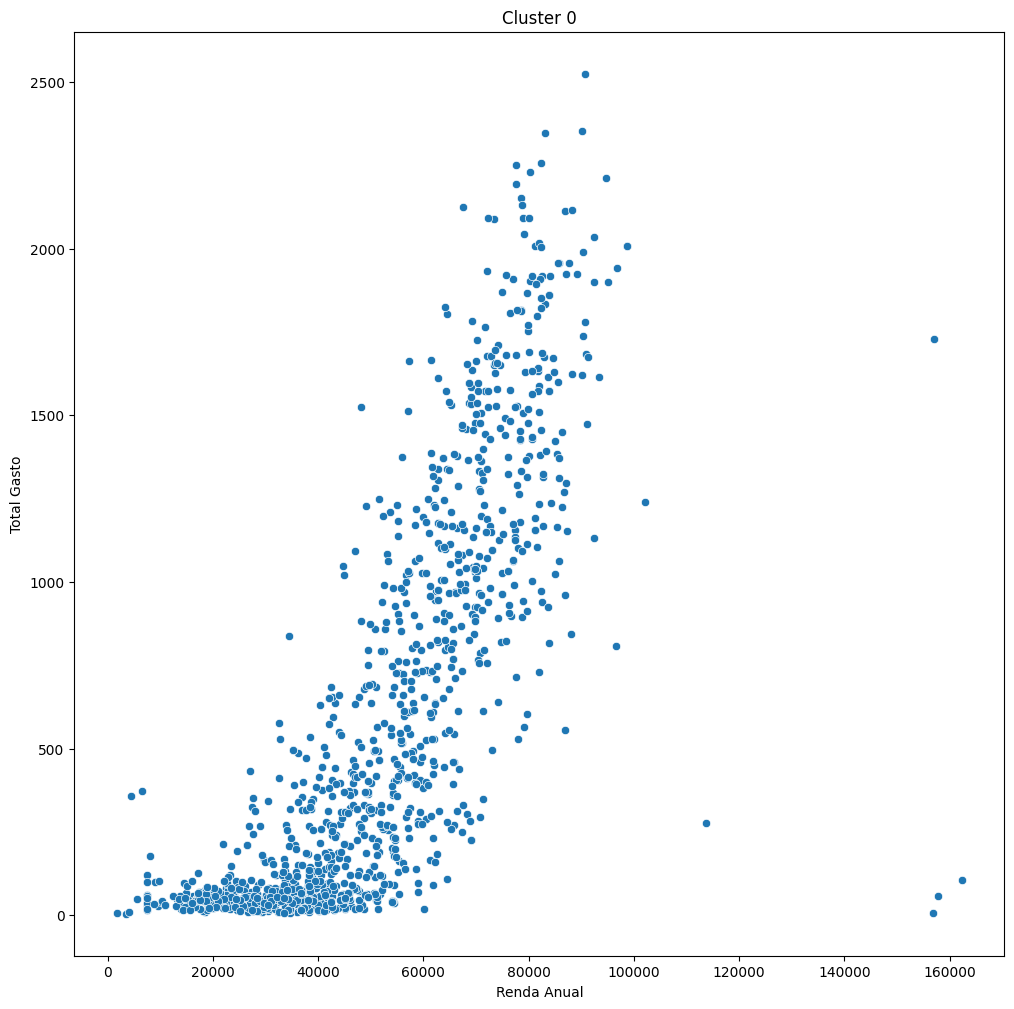

In [ ]:
plt.figure(figsize = (12,12))
sns.scatterplot(data = df_final_cluster0,
               x = 'Income',
               y = 'TotalMnt')
plt.title('Cluster 0')
plt.xlabel('Renda Anual')
plt.ylabel('Total Gasto')
plt.show()

#### Identificando o perfil no Cluster 1

In [ ]:
df_final[df_final['cluster'] == 1].describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt,index,cluster
count,493.000000,495.000000,495.000000,495.000000,495.00000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.0,495.0,495.000000,495.000000,495.000000,495.000000,495.0
mean,55096.699797,0.426263,0.511111,50.236364,314.40000,27.181818,177.391919,37.296970,28.775758,45.301010,2.343434,4.327273,2.783838,5.935354,5.292929,0.064646,0.084848,0.070707,0.066667,0.016162,0.008081,3.0,11.0,0.149495,52.519192,630.347475,1094.135354,1.0
std,35102.883923,0.545609,0.554132,28.206273,334.64687,39.569179,238.278933,52.828064,42.202330,51.257747,1.989658,2.680331,3.038175,3.229398,2.426459,0.246150,0.278938,0.256594,0.249696,0.126224,0.089620,0.0,0.0,0.356936,11.672797,584.871359,649.329205,0.0
min,6835.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000,6.000000,2.000000,1.0
25%,37070.000000,0.000000,0.000000,27.000000,27.50000,2.000000,19.000000,3.000000,2.000000,10.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,82.500000,519.000000,1.0
50%,53858.000000,0.000000,0.000000,53.000000,203.00000,10.000000,80.000000,13.000000,10.000000,26.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,51.000000,490.000000,1064.000000,1.0
75%,69109.000000,1.000000,1.000000,75.000000,502.50000,34.000000,252.000000,47.000000,35.000000,59.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,62.000000,1033.000000,1657.000000,1.0
max,666666.000000,2.000000,2.000000,99.000000,1492.00000,194.000000,1622.000000,258.000000,198.000000,247.000000,15.000000,11.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,80.000000,2525.000000,2235.000000,1.0


In [ ]:
df_final_cluster1 = df_final[df_final['cluster'] == 1]

In [ ]:
df_final_cluster1

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,index,cluster
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,776,False,False,True,False,False,False,False,False,False,False,True,False,False,2,1
5,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,54,716,False,False,False,True,False,False,False,False,False,False,True,False,False,5,1
6,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,50,590,False,False,True,False,False,False,False,True,False,False,False,False,False,6,1
18,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0,72,1782,False,False,False,True,False,False,False,False,True,False,False,False,False,18,1
22,58607.0,0,1,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,0,3,11,0,72,972,False,False,False,False,True,False,False,False,True,False,False,False,False,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,NaN,0,0,53,32,2,1607,12,4,22,0,0,0,1,0,0,1,0,0,0,0,3,11,0,43,1679,True,False,False,False,False,False,False,False,False,False,True,False,False,2228,1
2232,26816.0,0,0,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0,35,22,False,False,True,False,False,False,False,False,False,True,False,False,False,2232,1
2233,666666.0,1,0,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0,44,62,False,False,True,False,False,False,False,False,False,False,True,False,False,2233,1
2234,34421.0,1,0,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0,47,30,False,False,True,False,False,False,False,False,True,False,False,False,False,2234,1


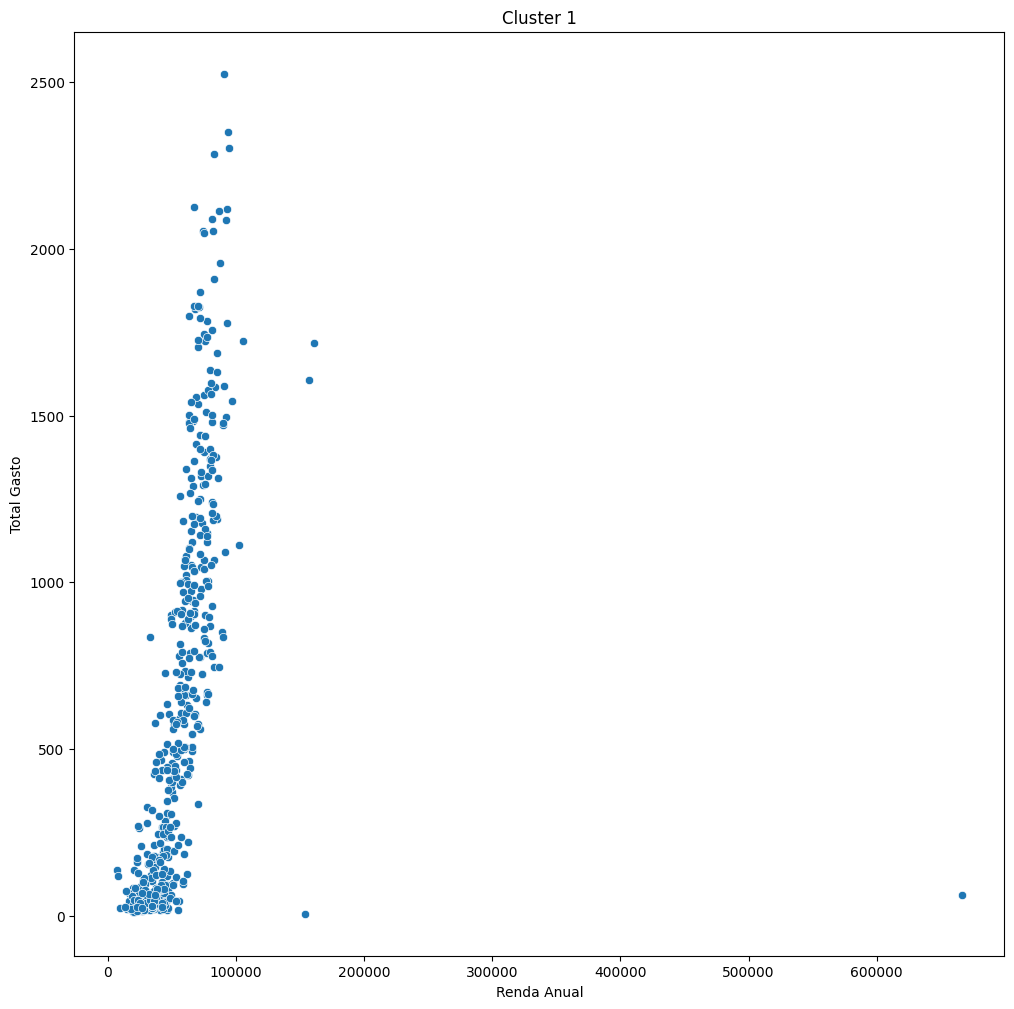

In [ ]:
plt.figure(figsize = (12,12))
sns.scatterplot(data = df_final_cluster1,
               x = 'Income',
               y = 'TotalMnt')
plt.title('Cluster 1')
plt.xlabel('Renda Anual')
plt.ylabel('Total Gasto')
plt.show()

#### Identificando o perfil no Cluster 2

In [ ]:
df_final[df_final['cluster'] == 2].describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt,index,cluster
count,497.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.00000,501.0,501.0,501.000000,501.000000,501.000000,501.000000,501.0
mean,53952.826962,0.379242,0.461078,49.151697,332.163673,30.259481,195.039920,45.131737,31.858283,49.650699,2.159681,4.221557,3.137725,6.073852,5.029940,0.103792,0.069860,0.081836,0.093812,0.013972,0.00998,3.0,11.0,0.183633,51.948104,684.103792,1134.768463,2.0
std,21230.597204,0.513701,0.544961,29.597448,339.852658,42.613713,243.795788,60.630806,44.237019,57.643766,1.790657,2.829278,3.214186,3.344927,2.442356,0.305296,0.255166,0.274389,0.291859,0.117492,0.09950,0.0,0.0,0.387571,12.362415,630.672965,632.931012,0.0
min,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.0,11.0,0.000000,26.000000,6.000000,0.000000,2.0
25%,36627.000000,0.000000,0.000000,24.000000,29.000000,2.000000,19.000000,3.000000,2.000000,10.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.0,11.0,0.000000,43.000000,84.000000,633.000000,2.0
50%,54197.000000,0.000000,0.000000,49.000000,224.000000,11.000000,92.000000,13.000000,12.000000,28.000000,2.000000,4.000000,2.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.0,11.0,0.000000,51.000000,506.000000,1094.000000,2.0
75%,71965.000000,1.000000,1.000000,75.000000,547.000000,37.000000,293.000000,69.000000,43.000000,65.000000,3.000000,6.000000,5.000000,9.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.0,11.0,0.000000,62.000000,1152.000000,1708.000000,2.0
max,101970.000000,2.000000,2.000000,99.000000,1478.000000,193.000000,1725.000000,250.000000,196.000000,291.000000,15.000000,23.000000,28.000000,13.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.0,11.0,1.000000,81.000000,2524.000000,2230.000000,2.0


In [ ]:
df_final_cluster2 = df_final[df_final['cluster'] == 2]

In [ ]:
df_final_cluster2

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,index,cluster
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,1617,False,False,True,False,False,False,False,False,False,True,False,False,False,0,2
12,63033.0,0,0,82,194,61,480,225,112,30,1,3,4,8,2,0,0,0,0,0,0,3,11,0,62,1102,False,False,True,False,False,False,False,True,False,False,False,False,False,12,2
15,82800.0,0,0,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1,75,1315,False,False,False,False,True,False,False,False,False,True,False,False,False,15,2
21,2447.0,1,0,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0,42,1730,False,False,True,False,False,False,False,False,True,False,False,False,False,21,2
29,84618.0,0,0,96,684,100,801,21,66,0,1,6,9,10,2,0,0,1,0,0,0,3,11,0,56,1672,False,False,False,False,True,False,False,False,True,False,False,False,False,29,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,14918.0,0,1,52,3,3,3,15,4,15,1,1,0,3,6,0,0,0,0,0,0,3,11,0,58,43,False,True,False,False,False,False,False,False,False,False,True,False,False,2208,2
2210,41769.0,0,1,31,302,29,131,32,0,27,6,8,1,7,8,0,0,0,0,0,0,3,11,0,66,521,True,False,False,False,False,False,False,True,False,False,False,False,False,2210,2
2214,5305.0,0,1,12,12,4,7,1,3,5,0,1,0,0,13,0,0,0,0,0,0,3,11,0,45,32,False,False,True,False,False,False,False,False,True,False,False,False,False,2214,2
2218,22775.0,1,0,40,5,1,8,0,0,1,1,1,0,2,8,0,0,0,0,0,0,3,11,0,43,15,False,False,True,False,False,False,False,False,False,False,True,False,False,2218,2


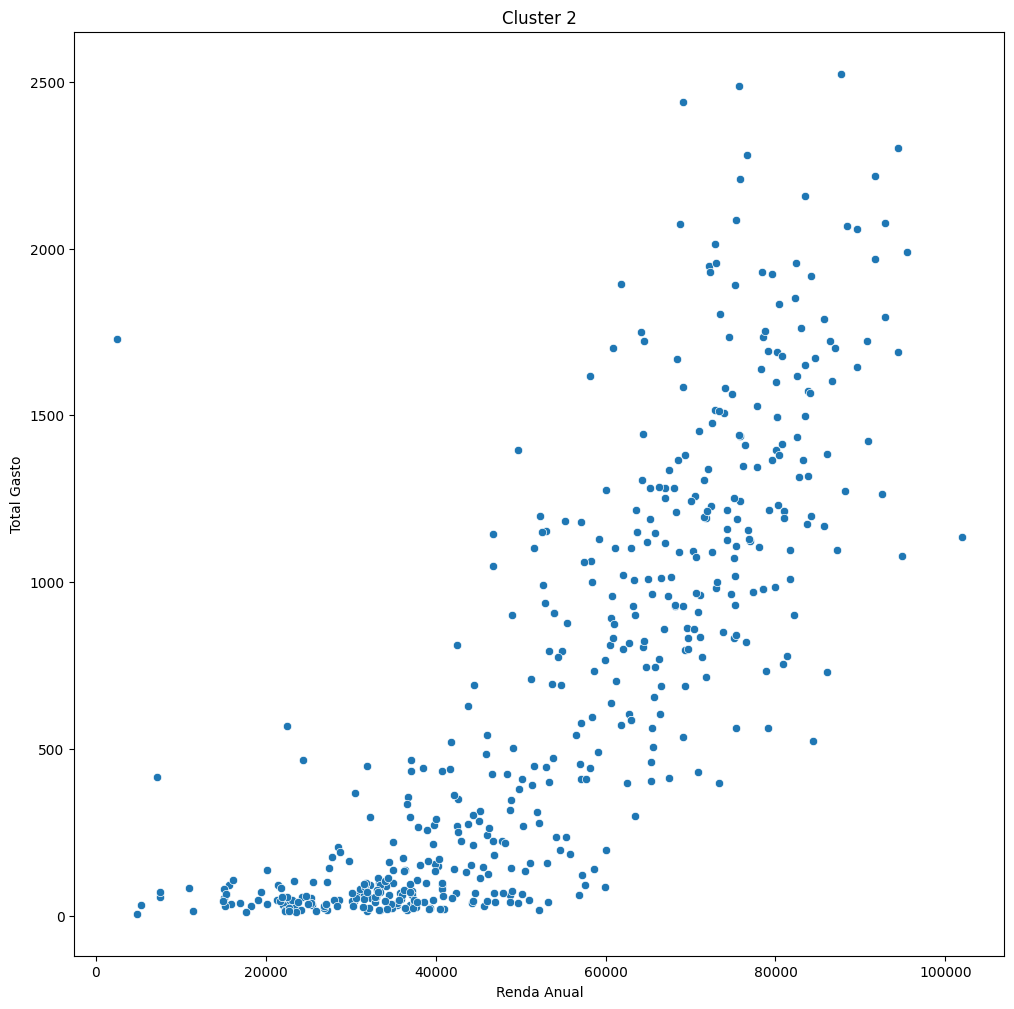

In [ ]:
plt.figure(figsize = (12,12))
sns.scatterplot(data = df_final_cluster2,
               x = 'Income',
               y = 'TotalMnt')
plt.title('Cluster 2')
plt.xlabel('Renda Anual')
plt.ylabel('Total Gasto')
plt.show()

## Clusterização com K-means

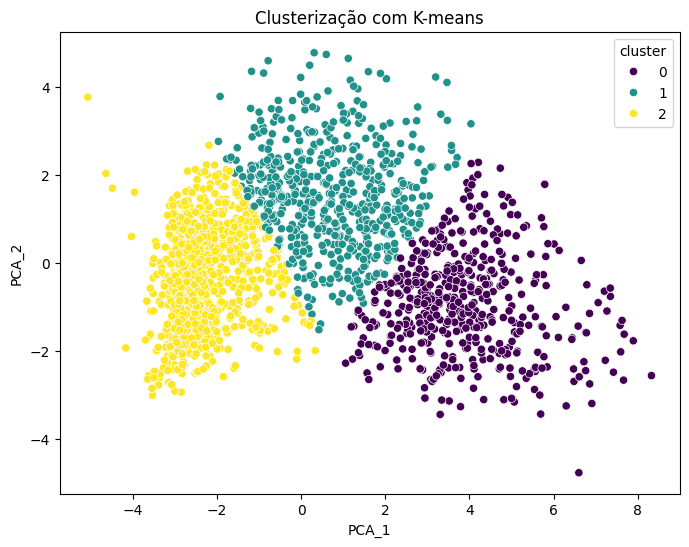

Silhouette Score: 0.48664762937800193
Davies-Bouldin Index: 0.7592178275189884
Calinski-Harabasz Index: 3447.394075359182


In [ ]:
# prompt: FAça como no topico Clusterizacao com a clusterizacao hierarquica aglomerativa, só que agora usando Kmeans

from sklearn.cluster import KMeans

# ... (código anterior permanece inalterado)

# ## Clusterização com K-means
kmeans = KMeans(n_clusters=3, random_state=42)  # Define o número de clusters
y_kmeans = kmeans.fit_predict(df_components)

df_components['cluster'] = y_kmeans

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='cluster', data=df_components, palette='viridis')
plt.title('Clusterização com K-means')
plt.show()

# ### Métricas de avaliação do K-means
silhouette_avg = silhouette_score(df_components.drop('cluster', axis=1), y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

davies_bouldin_index = davies_bouldin_score(df_components.drop('cluster', axis=1), y_kmeans)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

calinski_harabasz_index = calinski_harabasz_score(df_components.drop('cluster', axis=1), y_kmeans)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

# ... (resto do código para análise dos clusters, similar ao da clusterização hierárquica)
# Adapte o código para usar y_kmeans em vez de y_hc
df4.loc[:,'cluster'] = y_kmeans
# ... (código para plotar gráficos e análises dos clusters)

## Comparação entre Aglomeração hierarquica e Kmeans

In [ ]:
# Assuming silhouette_avg, davies_bouldin_index, and calinski_harabasz_index
# are already calculated for k-means

kmeans_metrics = {
    'k-means': [silhouette_avg, davies_bouldin_index, calinski_harabasz_index]
}
kmeans_series = pd.Series(kmeans_metrics['k-means'], index=['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'])



In [ ]:
comparacao_agloHieraquica_vs_kmeans['K-means'] = kmeans_series.values

In [ ]:
comparacao_agloHieraquica_vs_kmeans

,Metric,Agl_Hierarquica,K-means
0,Silhouette Score,0.462209,0.486648
1,Davies-Bouldin Index,0.816886,0.759218
2,Calinski-Harabasz Index,3014.743939,3447.394075


# Analise e descobrimento de caracteristicas de cada perfil

### Perfil 1

In [ ]:
df_cliente_perfil_0 = pd.read_csv('/content/df_cliente_perfil_0.csv')

In [ ]:
df_cliente_perfil_0.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'TotalMnt', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'index', 'cluster'],
      dtype='object')

In [ ]:
# Criada a nova coluna 'AcceptedCmpTotal'
df_cliente_perfil_0['AcceptedCmpTotal'] = df_cliente_perfil_0[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum(axis=1)

In [ ]:
#Criado um Intervalo de idades
df_cliente_perfil_0['intervalo_idade'] = df_cliente_perfil_0['age'].apply(lambda x:
                                                      '< 30' if x < 30
                                                      else '< 50' if x < 50
                                                      else '< 70' if x < 70
                                                      else '71+')

In [ ]:
df_cliente_perfil_0['AcceptedCmpTotal'].value_counts()

,count
AcceptedCmpTotal,
0,978
1,170
2,38
3,25
4,3


In [ ]:
df_cliente_perfil_0_desc = df_cliente_perfil_0.describe()
df_cliente_perfil_0.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt,index,cluster,AcceptedCmpTotal
count,1211.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.0,1214.0,1214.000000,1214.000000,1214.000000,1214.000000,1214.0,1214.000000
mean,50354.895954,0.472817,0.521417,48.593904,289.809720,24.340198,152.527183,34.876442,24.523064,40.895387,2.382208,3.924217,2.429160,5.626853,5.442339,0.065074,0.073311,0.070840,0.052718,0.012356,0.009061,3.0,11.0,0.136738,51.959638,566.971993,1127.261120,0.0,0.274300
std,21501.257685,0.540681,0.539414,28.973348,336.653318,38.530665,212.794872,52.899674,39.200300,48.981529,1.953004,2.721934,2.733175,3.209626,2.418237,0.246758,0.260754,0.256663,0.223563,0.110514,0.094796,0.0,0.0,0.343712,11.452796,596.434535,642.811025,0.0,0.644373
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,25.000000,5.000000,1.000000,0.0,0.000000
25%,34026.000000,0.000000,0.000000,24.000000,19.250000,1.000000,14.000000,2.000000,1.000000,8.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,61.250000,567.250000,0.0,0.000000
50%,49514.000000,0.000000,1.000000,49.000000,156.000000,7.000000,54.000000,11.000000,7.000000,22.000000,2.000000,3.000000,1.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,51.000000,312.000000,1144.000000,0.0,0.000000
75%,66380.000000,1.000000,1.000000,74.000000,481.250000,29.000000,205.750000,43.750000,29.750000,53.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,61.000000,1003.250000,1673.750000,0.0,0.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,77.000000,2525.000000,2236.000000,0.0,4.000000


In [ ]:
colunas = ['age', 'Income', 'Kidhome', 'Teenhome', 'TotalMnt', 'AcceptedCmpTotal', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df_cliente_perfil_0_desc.loc[['mean'], colunas]

,age,Income,Kidhome,Teenhome,TotalMnt,AcceptedCmpTotal,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
mean,51.959638,50354.895954,0.472817,0.521417,566.971993,0.2743,48.593904,2.382208,3.924217,2.42916,5.626853


In [ ]:
df_cliente_perfil_0['AcceptedCmpTotal'].value_counts()

,count
AcceptedCmpTotal,
0,978
1,170
2,38
3,25
4,3


#### Analise estatística do Perfil 0

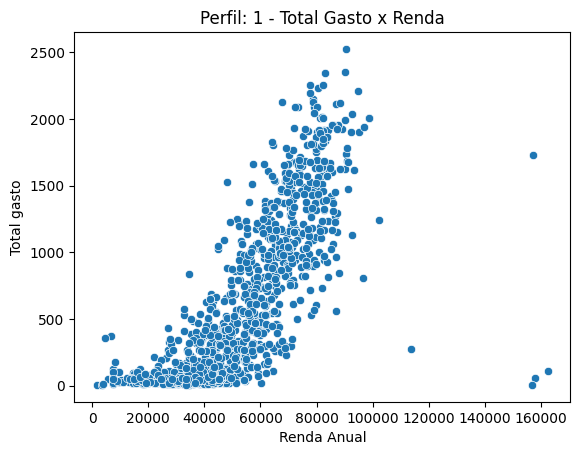

In [ ]:
sns.scatterplot(data=df_cliente_perfil_0, y='TotalMnt', x='Income')
plt.title('Perfil: 1 - Total Gasto x Renda')
plt.ylabel('Total gasto')
plt.xlabel('Renda Anual')
plt.show()

### Perfil 1

In [ ]:
df_cliente_perfil_1 = pd.read_csv('/content/df_cliente_perfil_1.csv')

In [ ]:
# Criada a nova coluna 'AcceptedCmpTotal'
df_cliente_perfil_1['AcceptedCmpTotal'] = df_cliente_perfil_1[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum(axis=1)

In [ ]:
#Criado um Intervalo de idades
df_cliente_perfil_1['intervalo_idade'] = df_cliente_perfil_1['age'].apply(lambda x:
                                                      '< 30' if x < 30
                                                      else '< 50' if x < 50
                                                      else '< 70' if x < 70
                                                      else '71+')

In [ ]:
df_cliente_perfil_1['AcceptedCmpTotal'].value_counts()

,count
AcceptedCmpTotal,
0,391
1,73
2,20
3,7
4,4


In [ ]:
df_cliente_perfil_1_desc = df_cliente_perfil_1.describe()
df_cliente_perfil_1.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt,index,cluster,AcceptedCmpTotal
count,493.000000,495.000000,495.000000,495.000000,495.00000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.0,495.0,495.000000,495.000000,495.000000,495.000000,495.0,492.000000
mean,55096.699797,0.426263,0.511111,50.236364,314.40000,27.181818,177.391919,37.296970,28.775758,45.301010,2.343434,4.327273,2.783838,5.935354,5.292929,0.064646,0.084848,0.070707,0.066667,0.016162,0.008081,3.0,11.0,0.149495,52.519192,630.347475,1094.135354,1.0,0.274390
std,35102.883923,0.545609,0.554132,28.206273,334.64687,39.569179,238.278933,52.828064,42.202330,51.257747,1.989658,2.680331,3.038175,3.229398,2.426459,0.246150,0.278938,0.256594,0.249696,0.126224,0.089620,0.0,0.0,0.356936,11.672797,584.871359,649.329205,0.0,0.647661
min,6835.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000,6.000000,2.000000,1.0,0.000000
25%,37070.000000,0.000000,0.000000,27.000000,27.50000,2.000000,19.000000,3.000000,2.000000,10.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,82.500000,519.000000,1.0,0.000000
50%,53858.000000,0.000000,0.000000,53.000000,203.00000,10.000000,80.000000,13.000000,10.000000,26.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,51.000000,490.000000,1064.000000,1.0,0.000000
75%,69109.000000,1.000000,1.000000,75.000000,502.50000,34.000000,252.000000,47.000000,35.000000,59.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,62.000000,1033.000000,1657.000000,1.0,0.000000
max,666666.000000,2.000000,2.000000,99.000000,1492.00000,194.000000,1622.000000,258.000000,198.000000,247.000000,15.000000,11.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,80.000000,2525.000000,2235.000000,1.0,4.000000


In [ ]:
# Calculate the required statistics
media_idade = df_cliente_perfil_1['age'].mean()
renda_media = df_cliente_perfil_1['Income'].mean()
total_gasto_medio = df_cliente_perfil_1['TotalMnt'].mean()
num_filhos_min = df_cliente_perfil_1['Kidhome'].min()
num_filhos_max = df_cliente_perfil_1['Kidhome'].max()
maior_aceite_campanhas = df_cliente_perfil_1['AcceptedCmpTotal'].max() # Assuming 'AcceptedCmpTotal' exists
media_dias_ultima_compra = df_cliente_perfil_1['Recency'].mean()
media_compras_promocoes = df_cliente_perfil_1['NumDealsPurchases'].mean()
media_compras_online = df_cliente_perfil_1['NumWebPurchases'].mean()
media_compras_catalogo = df_cliente_perfil_1['NumCatalogPurchases'].mean()
media_compras_loja = df_cliente_perfil_1['NumStorePurchases'].mean()


# Print the results
print(f"Média de Idade: {media_idade}")
print(f"Renda média: {renda_media}")
print(f"Total gasto médio: {total_gasto_medio}")
print(f"Número de filhos (min, max): ({num_filhos_min}, {num_filhos_max})")
print(f"Maior aceite de campanhas: {maior_aceite_campanhas}")
print(f"Média de dias desde a última compra: {media_dias_ultima_compra}")
print(f"Média de Compras em promoções: {media_compras_promocoes}")
print(f"Média de Compras online: {media_compras_online}")
print(f"Média de Compras pelo catálogo: {media_compras_catalogo}")
print(f"Média de Compras na loja: {media_compras_loja}")

Média de Idade: 52.51919191919192
Renda média: 55096.69979716025
Total gasto médio: 630.3474747474747
Número de filhos (min, max): (0, 2)
Maior aceite de campanhas: 4.0
Média de dias desde a última compra: 50.236363636363635
Média de Compras em promoções: 2.3434343434343434
Média de Compras online: 4.327272727272727
Média de Compras pelo catálogo: 2.783838383838384
Média de Compras na loja: 5.935353535353535


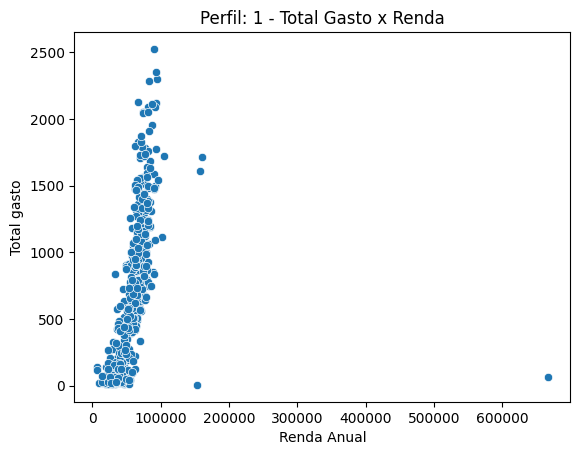

In [ ]:
sns.scatterplot(data=df_cliente_perfil_1, y='TotalMnt', x='Income')
plt.title('Perfil: 1 - Total Gasto x Renda')
plt.ylabel('Total gasto')
plt.xlabel('Renda Anual')
plt.show()

### Perfil 2

In [ ]:
df_cliente_perfil_2 = pd.read_csv('/content/df_cliente_perfil_2.csv')

In [ ]:
# Criada a nova coluna 'AcceptedCmpTotal'
df_cliente_perfil_2['AcceptedCmpTotal'] = df_cliente_perfil_2[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum(axis=1)

In [ ]:
#Criado um Intervalo de idades
df_cliente_perfil_2['intervalo_idade'] = df_cliente_perfil_2['age'].apply(lambda x:
                                                      '< 30' if x < 30
                                                      else '< 50' if x < 50
                                                      else '< 70' if x < 70
                                                      else '71+')

In [ ]:
df_cliente_perfil_2['AcceptedCmpTotal'].value_counts()

,count
AcceptedCmpTotal,
0,380
1,80
2,25
3,12
4,4


In [ ]:
df_cliente_perfil_2_desc = df_cliente_perfil_2.describe()
df_cliente_perfil_2.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,TotalMnt,index,cluster,AcceptedCmpTotal
count,497.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.00000,501.0,501.0,501.000000,501.000000,501.000000,501.000000,501.0,501.000000
mean,53952.826962,0.379242,0.461078,49.151697,332.163673,30.259481,195.039920,45.131737,31.858283,49.650699,2.159681,4.221557,3.137725,6.073852,5.029940,0.103792,0.069860,0.081836,0.093812,0.013972,0.00998,3.0,11.0,0.183633,51.948104,684.103792,1134.768463,2.0,0.363273
std,21230.597204,0.513701,0.544961,29.597448,339.852658,42.613713,243.795788,60.630806,44.237019,57.643766,1.790657,2.829278,3.214186,3.344927,2.442356,0.305296,0.255166,0.274389,0.291859,0.117492,0.09950,0.0,0.0,0.387571,12.362415,630.672965,632.931012,0.0,0.756154
min,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.0,11.0,0.000000,26.000000,6.000000,0.000000,2.0,0.000000
25%,36627.000000,0.000000,0.000000,24.000000,29.000000,2.000000,19.000000,3.000000,2.000000,10.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.0,11.0,0.000000,43.000000,84.000000,633.000000,2.0,0.000000
50%,54197.000000,0.000000,0.000000,49.000000,224.000000,11.000000,92.000000,13.000000,12.000000,28.000000,2.000000,4.000000,2.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.0,11.0,0.000000,51.000000,506.000000,1094.000000,2.0,0.000000
75%,71965.000000,1.000000,1.000000,75.000000,547.000000,37.000000,293.000000,69.000000,43.000000,65.000000,3.000000,6.000000,5.000000,9.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.0,11.0,0.000000,62.000000,1152.000000,1708.000000,2.0,0.000000
max,101970.000000,2.000000,2.000000,99.000000,1478.000000,193.000000,1725.000000,250.000000,196.000000,291.000000,15.000000,23.000000,28.000000,13.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.0,11.0,1.000000,81.000000,2524.000000,2230.000000,2.0,4.000000


In [ ]:
# Calculate the required statistics
media_idade = df_cliente_perfil_2['age'].mean()
renda_media = df_cliente_perfil_2['Income'].mean()
total_gasto_medio = df_cliente_perfil_2['TotalMnt'].mean()
num_filhos_min = df_cliente_perfil_2['Kidhome'].min()
num_filhos_max = df_cliente_perfil_2['Kidhome'].max()
maior_aceite_campanhas = df_cliente_perfil_2['AcceptedCmpTotal'].max() # Assuming 'AcceptedCmpTotal' exists
media_dias_ultima_compra = df_cliente_perfil_2['Recency'].mean()
media_compras_promocoes = df_cliente_perfil_2['NumDealsPurchases'].mean()
media_compras_online = df_cliente_perfil_2['NumWebPurchases'].mean()
media_compras_catalogo = df_cliente_perfil_2['NumCatalogPurchases'].mean()
media_compras_loja = df_cliente_perfil_2['NumStorePurchases'].mean()


# Print the results
print(f"Média de Idade: {media_idade}")
print(f"Renda média: {renda_media}")
print(f"Total gasto médio: {total_gasto_medio}")
print(f"Número de filhos (min, max): ({num_filhos_min}, {num_filhos_max})")
print(f"Maior aceite de campanhas: {maior_aceite_campanhas}")
print(f"Média de dias desde a última compra: {media_dias_ultima_compra}")
print(f"Média de Compras em promoções: {media_compras_promocoes}")
print(f"Média de Compras online: {media_compras_online}")
print(f"Média de Compras pelo catálogo: {media_compras_catalogo}")
print(f"Média de Compras na loja: {media_compras_loja}")

Média de Idade: 51.94810379241517
Renda média: 53952.826961770625
Total gasto médio: 684.1037924151697
Número de filhos (min, max): (0, 2)
Maior aceite de campanhas: 4.0
Média de dias desde a última compra: 49.15169660678643
Média de Compras em promoções: 2.1596806387225547
Média de Compras online: 4.221556886227545
Média de Compras pelo catálogo: 3.1377245508982035
Média de Compras na loja: 6.073852295409182


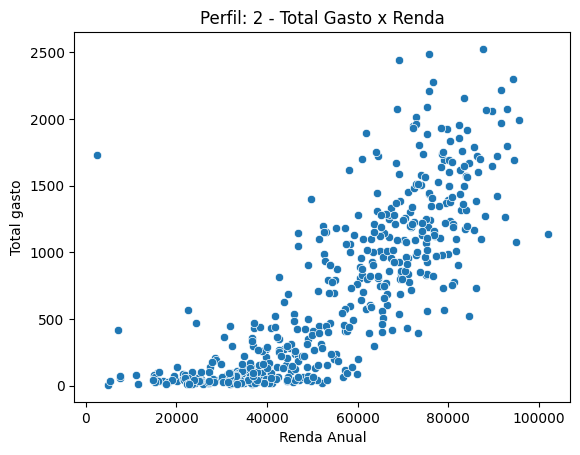

In [ ]:
sns.scatterplot(data=df_cliente_perfil_2, y='TotalMnt', x='Income')
plt.title('Perfil: 2 - Total Gasto x Renda')
plt.ylabel('Total gasto')
plt.xlabel('Renda Anual')
plt.show()